In [25]:
__author__ = 'Security'
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool

In [26]:
theta = 0.5
N = 1000
K = 500
thsRange = np.arange(0.01, 0.99, 0.01)

In [27]:
def getBernSample(theta):
    return stats.bernoulli.rvs(p=theta, size=N)

def bernFisherInfo(p, n):
    return n/(p * (1-p))

In [28]:
def drawPlot():
    data = [1/bernFisherInfo(p, N) for p in np.arange(0.01, 0.99, 0.01)]
    plt.plot(data, label=r'$\frac{1}{I_{X}(\theta)}$')
    plt.legend(loc='best')
    plt.ylim(0, 0.0003)
    plt.show()

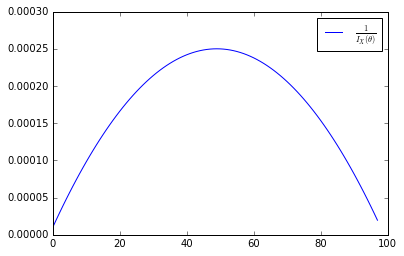

In [29]:
drawPlot()

Как видно из графика нижнюю оценку дисперсии можно более точно оценить при значениях $\theta$ близких к нулю и единицы

Для бернулевского распределения эффективная оценка $\hat{\theta} = \overline{X}$

In [30]:
def getEffectiveEst(sample):
    return np.average(sample)

In [37]:
def getS2(sample):
    return np.average(np.array(sample) ** 2) - (np.average(sample) ** 2)

In [40]:
dispersions = []
for th in thsRange:
    effEstimates = [getEffectiveEst(getBernSample(th)) for _ in range(K)]
    dispersions.append(getS2(effEstimates))

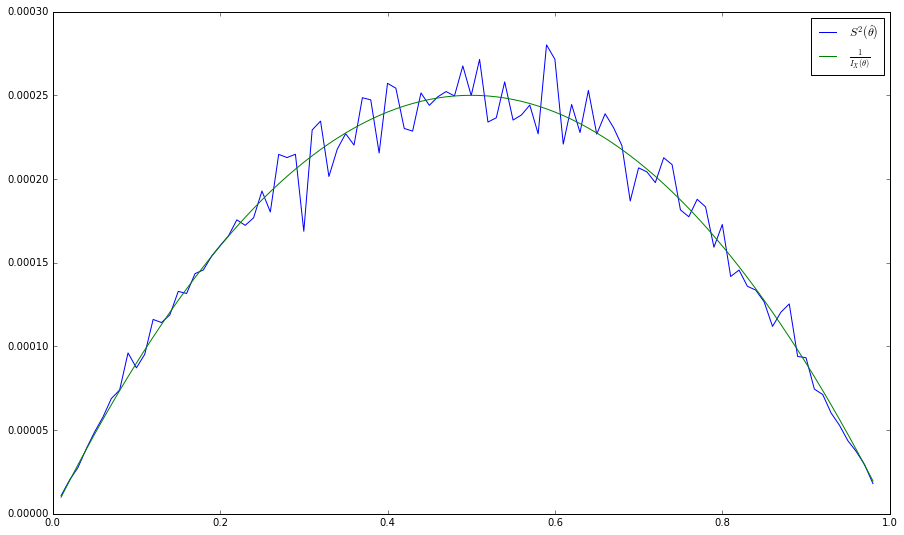

In [44]:
plt.figure(figsize=(15, 9))
plt.plot(thsRange, dispersions, label=r'$S^2({\hat{\theta}})$')
plt.plot(thsRange, [1/bernFisherInfo(p, N) for p in thsRange], label=r'$\frac{1}{I_{X}(\theta)}$')
plt.legend(loc='best')
plt.show()

На графике видно, что бутстрепная оценка дисперсии для эффективной оценки совпадает с нижней оценкой в неравенстве Рао-Крамера